In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1Oa3hC5g6wtOxyWCU7zjpxSs9Zgx8SIvKkwQTnFY0FS4/edit#gid=0


In [2]:
df.shape, df.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [6]:
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing



,0
Cabin,687
Age,177
Embarked,2


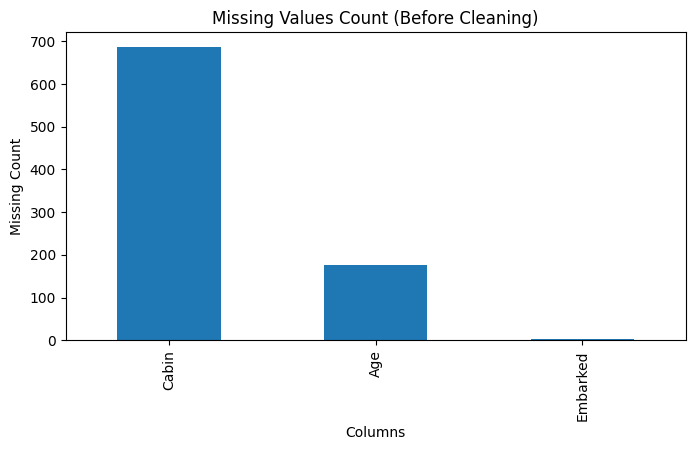

In [7]:
plt.figure(figsize=(8,4))
missing.plot(kind="bar")
plt.title("Missing Values Count (Before Cleaning)")
plt.xlabel("Columns")
plt.ylabel("Missing Count")
plt.show()


In [8]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Drop Cabin (too many missing)
df = df.drop(columns=["Cabin"])
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
df = df[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
df = pd.get_dummies(df, columns=["Sex","Embarked"], drop_first=True)
df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["Age","Fare"]] = scaler.fit_transform(df[["Age","Fare"]])

df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,0.271174,1,0,0.014151,True,False,True
1,1,1,0.472229,1,0,0.139136,False,False,False
2,1,3,0.321438,0,0,0.015469,False,False,True
3,1,1,0.434531,1,0,0.103644,False,False,True
4,0,3,0.434531,0,0,0.015713,True,False,True


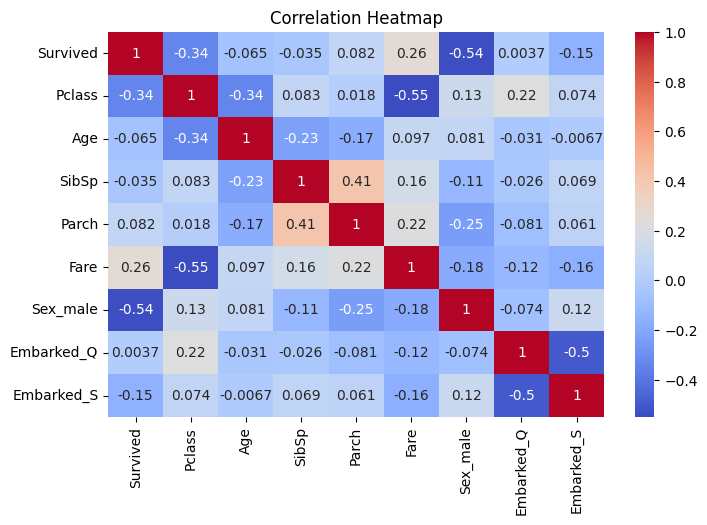

In [12]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [13]:
df.to_csv("cleaned_titanic_premium.csv", index=False)
print("Saved: cleaned_titanic_premium.csv")


Saved: cleaned_titanic_premium.csv
